In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv("datos/viajes_surfistas.csv")
df

homename  homecontinent               homecountry  \
0            Canadian in La La Land  North America  United States of America   
1            Canadian in La La Land  North America  United States of America   
2            Canadian in La La Land  North America  United States of America   
3            Canadian in La La Land  North America  United States of America   
4            Canadian in La La Land  North America  United States of America   
...                             ...            ...                       ...   
9506  Bridgetown, Western Australia      Australia                 Australia   
9507                  Lille, France         Europe                    France   
9508                             MX  South America                    Mexico   
9509        Kuta - Bali - Indonesia           Asia                 Indonesia   
9510        Kuta - Bali - Indonesia           Asia                 Indonesia   

        homelat     homelon travelcontinent             travelcountry  \
0     33.930030 -118.280993   North America  United States of America   
1     33.930030 -118.280993   North America  United States of America   
2     33.930030 -118.280993   North America  United States of America   
3     33.930030 -118.280993   North America  United States of America   
4     33.930030 -118.280993   North America  United States of America   
...         ...         ...             ...                       ...   
9506 -33.954448  116.131214       Australia                 Australia   
9507  50.629250    3.057256          Europe                    France   
9508  23.634501 -102.552784   South America                    Mexico   
9509  -8.739184  115.171130            Asia                 Indonesia   
9510  -8.739184  115.171130            Asia                 Indonesia   

      travellat   travellon  
0     33.887255 -118.411912  
1     34.022100 -118.481000  
2     34.030400 -118.779000  
3     33.887255 -118.411912  
4     33.888889 -118.405278  
...         ...         ...  
9506 -34.225000  115.017000  
9507  45.002343   -1.201475  
9508  21.016700 -101.250000  
9509  -8.710093  115.166845  
9510  -8.710093  115.166845  

[9511 rows x 9 columns]

In [3]:
nodos1 = df[["homecountry", "homelat", "homelon"]]
nodos1.columns = ["label", "lat", "lon"]
nodos1

label        lat         lon
0     United States of America  33.930030 -118.280993
1     United States of America  33.930030 -118.280993
2     United States of America  33.930030 -118.280993
3     United States of America  33.930030 -118.280993
4     United States of America  33.930030 -118.280993
...                        ...        ...         ...
9506                 Australia -33.954448  116.131214
9507                    France  50.629250    3.057256
9508                    Mexico  23.634501 -102.552784
9509                 Indonesia  -8.739184  115.171130
9510                 Indonesia  -8.739184  115.171130

[9511 rows x 3 columns]

In [4]:
nodos1_agrupados = nodos1.groupby(["lat", "lon"]).first()
nodos1_agrupados 

label
lat        lon                                  
-53.773631 -67.707288                  Argentina
-51.733333 -72.516667                      Chile
-46.548628 -71.631977                  Argentina
-45.878760  170.502798               New Zealand
-44.885637  168.666159               New Zealand
...                                          ...
 61.924110  25.748151                    Finland
 62.411363 -149.072971  United States of America
 63.264262  10.505392                     Norway
 64.200841 -149.493673  United States of America
 78.223172  15.626723                     Norway

[1646 rows x 1 columns]

In [5]:
nodos1_agrupados = nodos1_agrupados.reset_index()
nodos1_agrupados

lat         lon                     label
0    -53.773631  -67.707288                 Argentina
1    -51.733333  -72.516667                     Chile
2    -46.548628  -71.631977                 Argentina
3    -45.878760  170.502798               New Zealand
4    -44.885637  168.666159               New Zealand
...         ...         ...                       ...
1641  61.924110   25.748151                   Finland
1642  62.411363 -149.072971  United States of America
1643  63.264262   10.505392                    Norway
1644  64.200841 -149.493673  United States of America
1645  78.223172   15.626723                    Norway

[1646 rows x 3 columns]

In [6]:
nodos2 = df[["travelcountry", "travellat", "travellon"]]
nodos2.columns = ["label", "lat", "lon"]
nodos2_agrupados = nodos2.groupby(["lat", "lon"]).first()
nodos2_agrupados = nodos2_agrupados.reset_index()
nodos2_agrupados

lat         lon        label
0    -51.055000  -72.832300        Chile
1    -46.592167  -70.932012    Argentina
2    -45.911490  170.490247  New Zealand
3    -45.911290  170.490020  New Zealand
4    -45.904483  170.510135  New Zealand
...         ...         ...          ...
4076  64.133300  -21.933300      Iceland
4077  68.077244   13.474686       Norway
4078  68.207469   14.480151       Norway
4079  68.659089   18.883573       Norway
4080  78.217424   15.636744       Norway

[4081 rows x 3 columns]

In [8]:
nodos = pd.concat([nodos1_agrupados, nodos2_agrupados])
nodos 

lat         lon        label
0    -53.773631  -67.707288    Argentina
1    -51.733333  -72.516667        Chile
2    -46.548628  -71.631977    Argentina
3    -45.878760  170.502798  New Zealand
4    -44.885637  168.666159  New Zealand
...         ...         ...          ...
4076  64.133300  -21.933300      Iceland
4077  68.077244   13.474686       Norway
4078  68.207469   14.480151       Norway
4079  68.659089   18.883573       Norway
4080  78.217424   15.636744       Norway

[5727 rows x 3 columns]

In [9]:
nodos = nodos.groupby(["lat", "lon"]).first()
nodos = nodos.reset_index()
nodos

lat        lon      label
0    -53.773631 -67.707288  Argentina
1    -51.733333 -72.516667      Chile
2    -51.055000 -72.832300      Chile
3    -46.592167 -70.932012  Argentina
4    -46.548628 -71.631977  Argentina
...         ...        ...        ...
5720  68.077244  13.474686     Norway
5721  68.207469  14.480151     Norway
5722  68.659089  18.883573     Norway
5723  78.217424  15.636744     Norway
5724  78.223172  15.626723     Norway

[5725 rows x 3 columns]

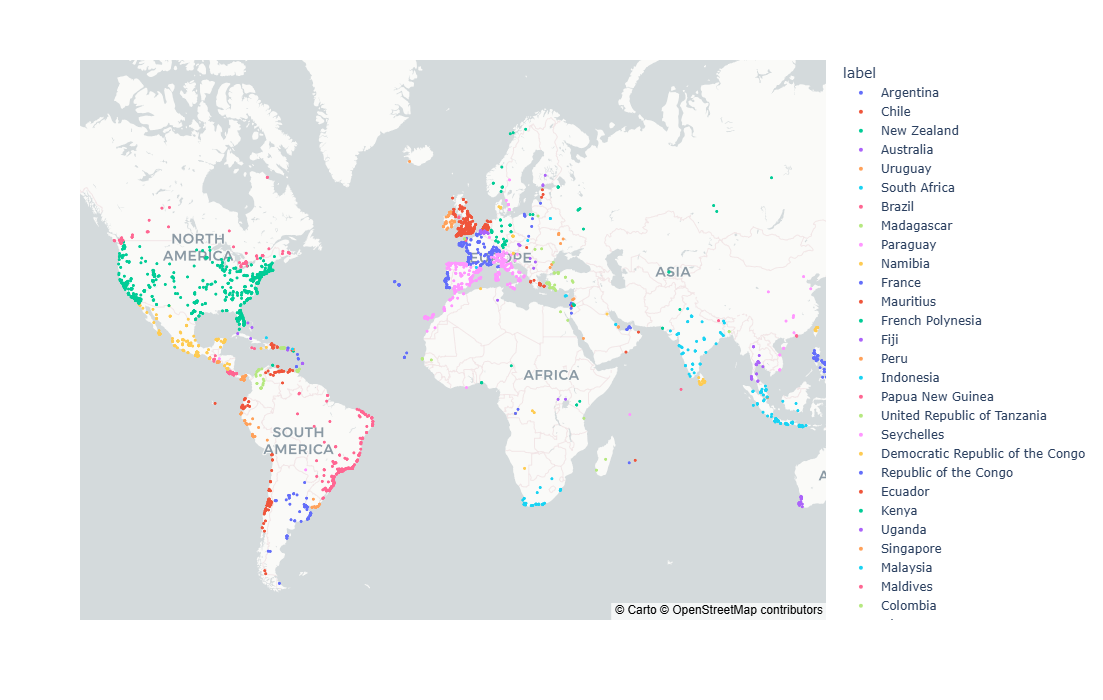

In [13]:
fig = px.scatter_mapbox(
    nodos, 
    lat="lat",
    lon="lon",
    mapbox_style="carto-positron",
    zoom=1,
    color="label",
    width=1000,
    height=700
)

fig.update_traces(
    marker={
        "size": 4
    }
)

In [14]:
lats = np.empty(len(df) * 3)
lats[::3] = df["homelat"]
lats[1::3] = df["travellat"]
lats[2::3] = None
lons = np.empty(len(df) * 3)
lons[::3] = df["homelon"]
lons[1::3] = df["travellon"]
lons[2::3] = None

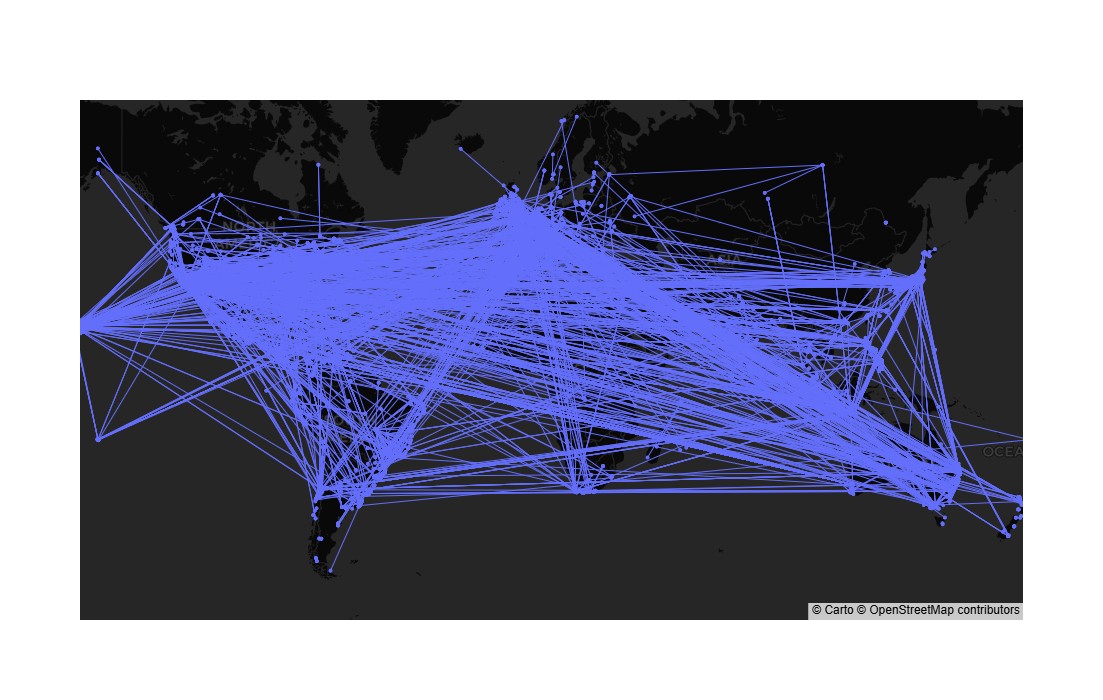

In [21]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scattermapbox(
        lon = lons,
        lat = lats,
        mode="markers+lines",
        marker={
            "size":5,
        },
        line={
            "width":1
        },
        opacity=1
    )
)

fig.update_layout(
    showlegend=False,
    mapbox={
        "style":"carto-darkmatter",
        "zoom": 1,
        "center":  {"lon":10, "lat":10}
    },
    width=1000,
    height=700
)

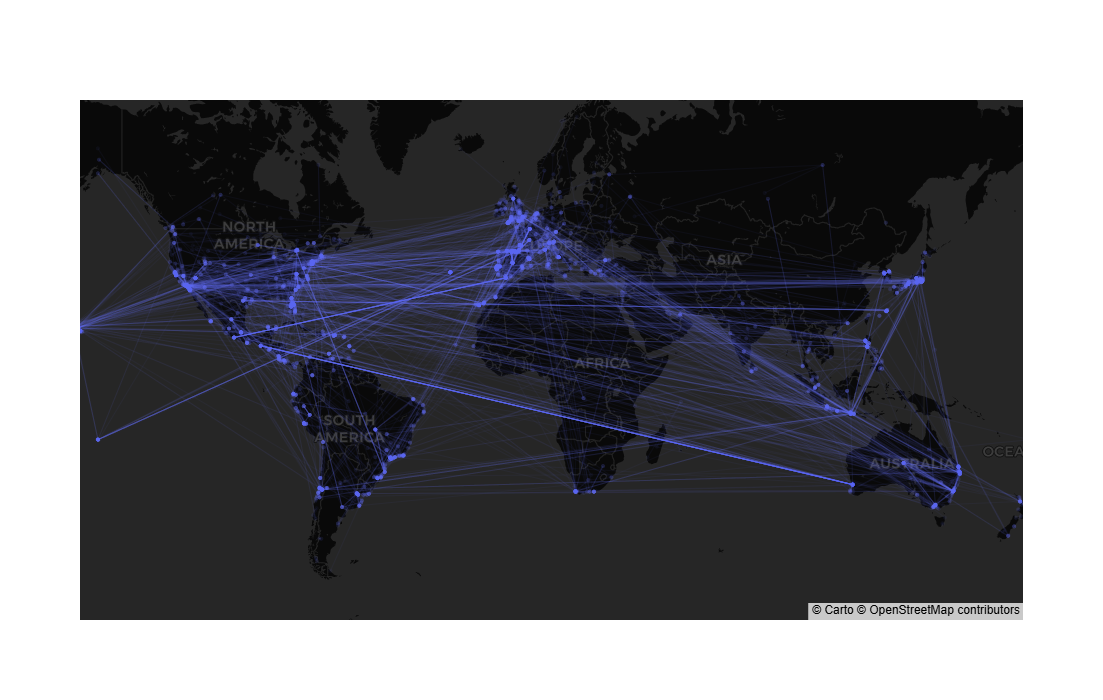

In [23]:
fig = go.Figure()

fig.add_trace(
    go.Scattermapbox(
        lon = lons,
        lat = lats,
        mode="markers+lines",
        marker={
            "size":5,
        },
        line={
            "width":1
        },
        opacity=0.05
    )
)

fig.update_layout(
    showlegend=False,
    mapbox={
        "style":"carto-darkmatter",
        "zoom": 1,
        "center":  {"lon":10, "lat":10}
    },
    width=1000,
    height=700
)